In [2]:
%load_ext autoreload
%autoreload 2

In [75]:
from hipp.aerial.aerial_preprocessing import AerialPreprocessing
from hipp.image import get_corner_blocks
from hipp.aerial.core import detect_fiducial, detect_fiducials
import hipp.aerial.quality_control as qc
import cv2
import matplotlib.pyplot as plt

In [76]:
img_file = "/home/godinlu/Documents/history-dataset/1978_09_06_aerial/raw_images/ARBCSRD00010030.tif"
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
corner_fiducial = cv2.imread("/home/godinlu/Documents/github/ship/hipp/examples/fiducials/corner_fiducial.png", cv2.IMREAD_GRAYSCALE)
subpixel_corner_fiducial = cv2.imread("/home/godinlu/Documents/github/ship/hipp/examples/fiducials/subpixel_corner_fiducial.png", cv2.IMREAD_GRAYSCALE)

corners, corners_coordinates = get_corner_blocks(img)

In [77]:
detected_fiducials = detect_fiducials(img, corner_fiducial, subpixel_corner_fiducial=subpixel_corner_fiducial)

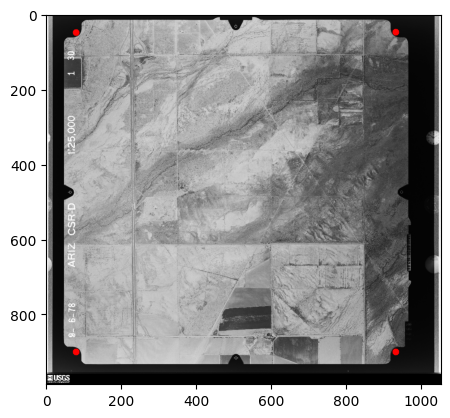

In [78]:
plt.imshow(qc.generate_detect_fiducials_qc(detected_fiducials, img))

In [17]:
detected_fiducials['edge_bottom_middle']

KeyError: 'edge_bottom_middle'

In [9]:
detect_fiducial(corners["bottom_left"], corner_fiducial, subpixel_corner_fiducial)

{'approx_center': (808.0, 2434.0),
 'approx_score': 0.9204955101013184,
 'subpixel_center': (809.5, 2434.875),
 'subpixel_score': 0.9646259546279907}

In [130]:
print(corners_coordinates)


{'top_left': (0, 0), 'top_right': (0, 7031), 'bottom_left': (6582, 0), 'bottom_right': (6582, 7031)}


In [121]:
select_img = corners["bottom_left"]
filtered_img = wallis_filter(select_img, 5, enhance_factor=500)
filtered_sobel = sobel_filter(filtered_img)
blurred = cv2.blur(select_img, (15, 15))

images = [select_img, filtered_img, filtered_sobel, blurred]

template = cv2.imread("/home/godinlu/Documents/github/ship/hipp/examples/fiducials/midside_fiducial.png", cv2.IMREAD_GRAYSCALE)
filtered_template = wallis_filter(template, 5, enhance_factor=500)
filtered_sobel_template = sobel_filter(filtered_template)
blurred_template = cv2.blur(template, (15, 15))

templates = [template, filtered_template, filtered_sobel_template, blurred_template]

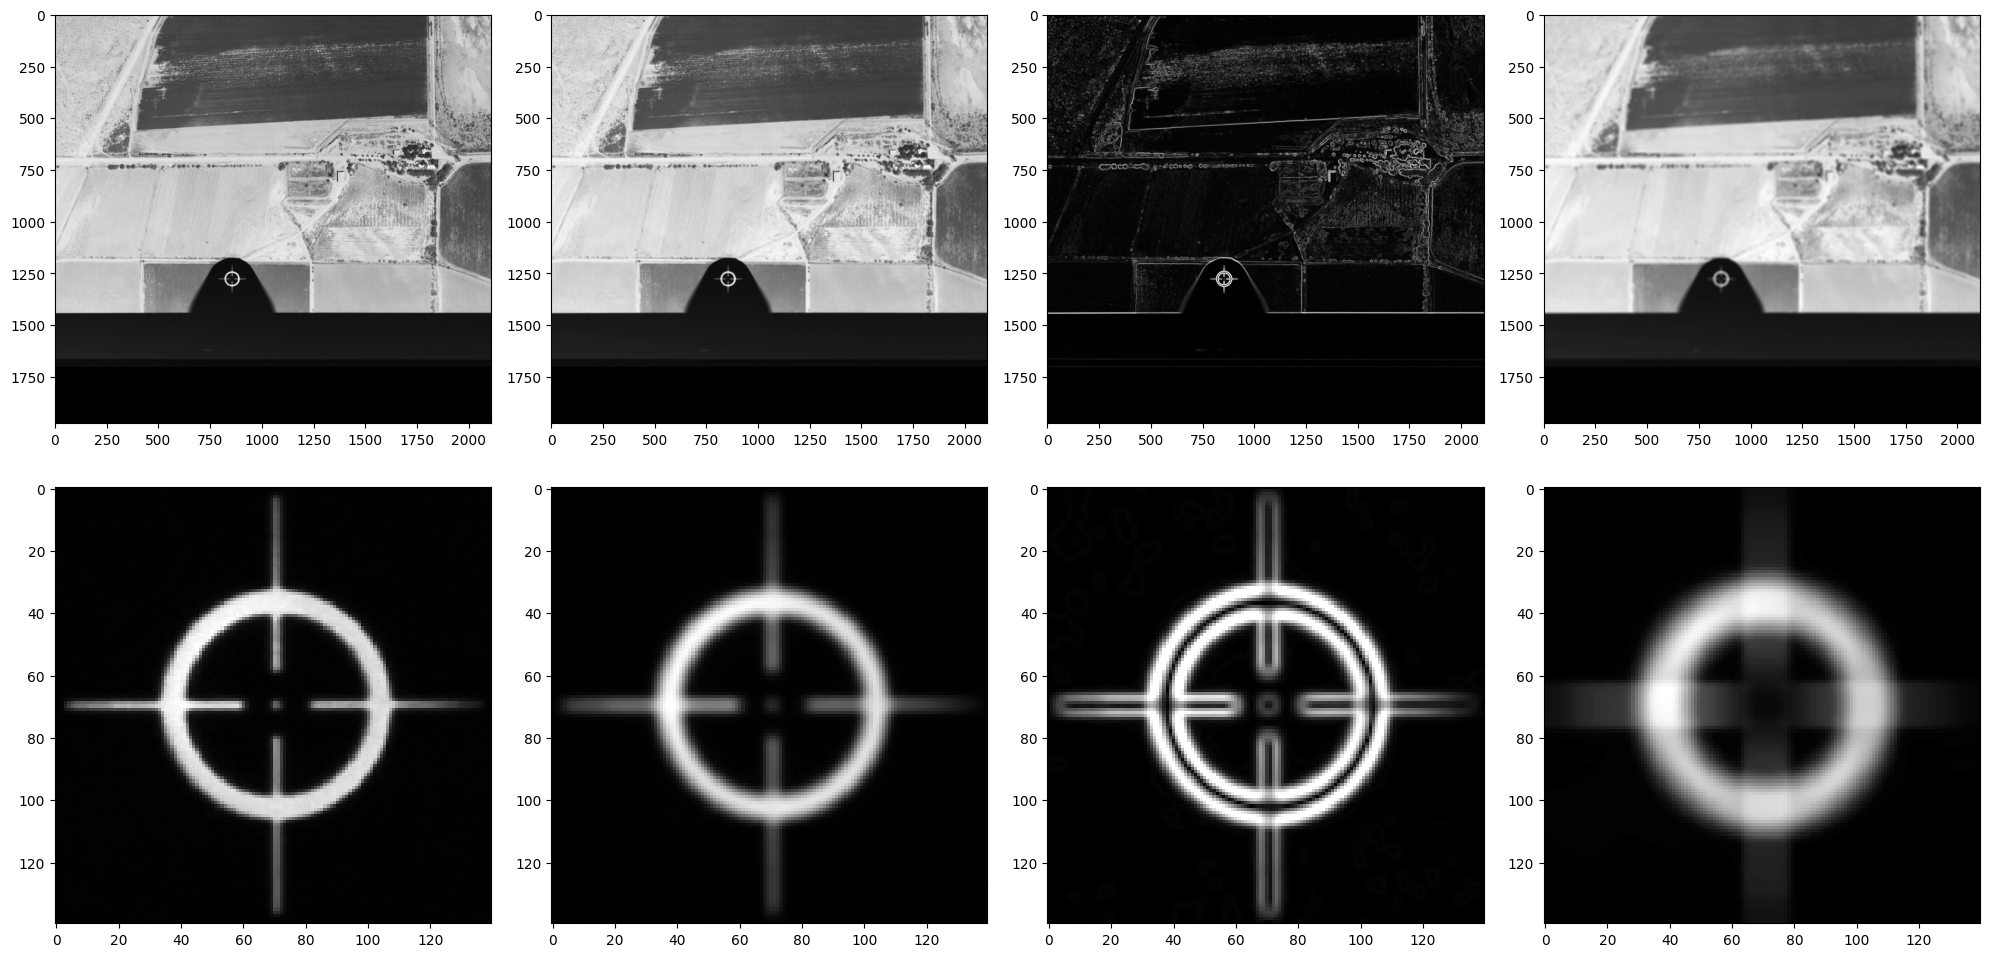

In [122]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in range(4):
    axs[0][i].imshow(images[i], cmap='gray')
    axs[1][i].imshow(templates[i], cmap='gray')
plt.tight_layout()
plt.show()

In [123]:
for i in range(4):
    result = cv2.matchTemplate(images[i], templates[i], cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(max_val)
    print(max_loc)

0.9729125499725342
(784, 1210)
0.9822736382484436
(784, 1210)
0.9543772339820862
(784, 1210)
0.9888837337493896
(784, 1210)


In [28]:
images_dir = "/home/godinlu/Documents/history-dataset/1978_09_06_aerial/raw_images/"

preproc = AerialPreprocessing(images_dir)

In [19]:
preproc.create_fiducial_template(corner=True, distance_around_fiducial=70)

In [20]:
preproc.create_fiducial_template(midside=True, distance_around_fiducial=70)

In [58]:
results = preproc.detect_fiducials(grid_size=5, quality_control=True)

Fiducials detection:   0%|          | 0/37 [00:00<?, ?it/s]

Fiducials detection: 100%|██████████| 37/37 [01:19<00:00,  2.16s/it]


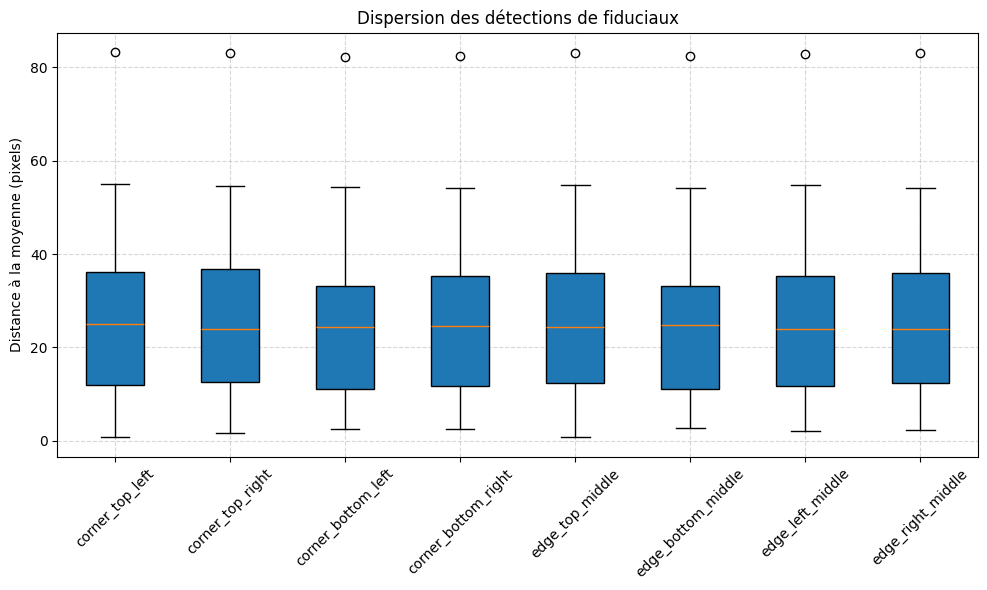

In [81]:
fig = qc.plot_fiducial_center_deviation_boxplots(results)

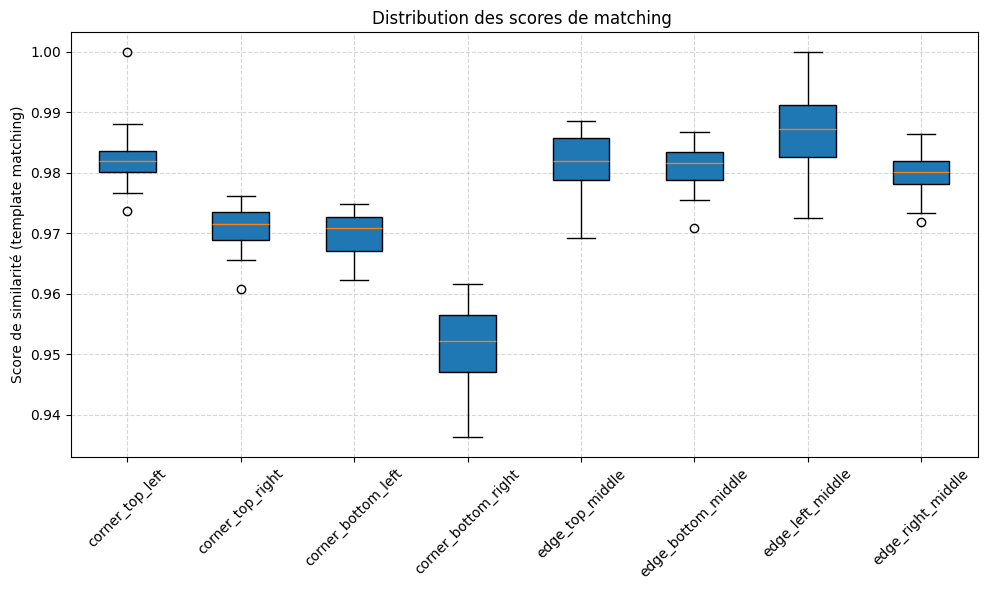

In [84]:
fig = qc.plot_fiducial_score_boxplots(results)

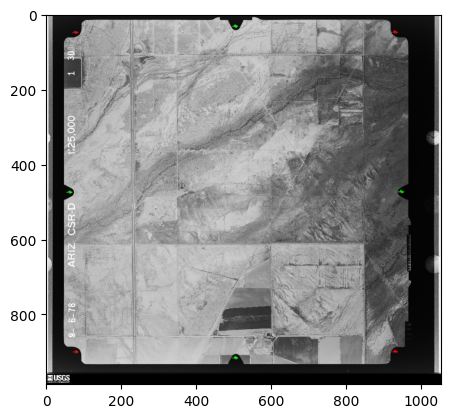

In [85]:
qc_img = qc.generate_detect_all_fiducials_qc(results, img)
plt.imshow(qc_img)